In [21]:
import torch 
from torch import nn
import numpy as np
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import time
import copy
import torch.nn.functional as F
import random

In [23]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=28*28, out_features=1000),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=1000, out_features=10),
    nn.Softmax(dim=1)
)

In [24]:
data = torchvision.datasets.MNIST(root = './mnist',train = True,transform = torchvision.transforms.ToTensor(), download=True)

In [25]:
data.data.shape


torch.Size([60000, 28, 28])

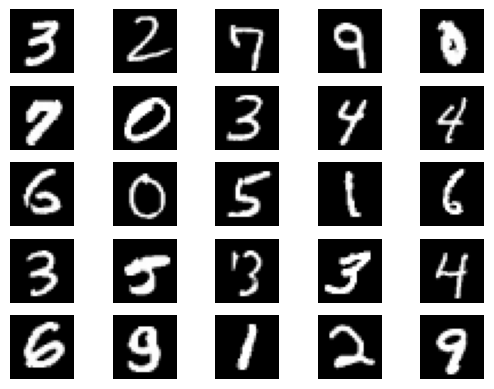

In [33]:
fig, ax = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(data.data[random.randrange(data.data.shape[0])], cmap='gray')
        ax[i][j].axis('off')

In [27]:
train_data, test_data = torch.utils.data.random_split(data, [0.7, 0.3])

In [28]:
batch_size = 64
dataloader = {
    'train' : torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True),
    'val' : torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
}

In [29]:
def train_model(model:nn.Module, dataloaders,criterion, optimizer, scheduler=None, num_epochs=25, device=torch.device("cpu")):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _,preds = torch.max(outputs, 1)
                    #print(outputs, labels.unsqueeze(1).float())
                    one_hot_labels = F.one_hot(labels, num_classes=10).float()
                    loss = criterion(outputs, one_hot_labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train' and scheduler:
                scheduler.step()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [30]:
train_model(model=model, dataloaders=dataloader, criterion=nn.CrossEntropyLoss(), optimizer=torch.optim.SGD(model.parameters(), lr=0.1), num_epochs=20, )

Epoch 0/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.8990 Acc: 0.6600


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.6794 Acc: 0.8160

Epoch 1/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.6578 Acc: 0.8278


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.6449 Acc: 0.8317

Epoch 2/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.6373 Acc: 0.8384


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.6352 Acc: 0.8378

Epoch 3/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.6280 Acc: 0.8440


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.6254 Acc: 0.8455

Epoch 4/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.6222 Acc: 0.8478


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.6223 Acc: 0.8457

Epoch 5/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.6178 Acc: 0.8511


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.6192 Acc: 0.8483

Epoch 6/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.6040 Acc: 0.8674


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5718 Acc: 0.9079

Epoch 7/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5596 Acc: 0.9177


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5572 Acc: 0.9168

Epoch 8/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5479 Acc: 0.9265


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5465 Acc: 0.9254

Epoch 9/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5413 Acc: 0.9310


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5426 Acc: 0.9279

Epoch 10/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5363 Acc: 0.9360


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5383 Acc: 0.9306

Epoch 11/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5323 Acc: 0.9390


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5346 Acc: 0.9352

Epoch 12/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5288 Acc: 0.9426


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5324 Acc: 0.9368

Epoch 13/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5256 Acc: 0.9449


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5302 Acc: 0.9384

Epoch 14/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5228 Acc: 0.9472


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5282 Acc: 0.9392

Epoch 15/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5204 Acc: 0.9497


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5271 Acc: 0.9404

Epoch 16/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5182 Acc: 0.9515


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5250 Acc: 0.9416

Epoch 17/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5162 Acc: 0.9531


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5236 Acc: 0.9429

Epoch 18/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5142 Acc: 0.9552


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5226 Acc: 0.9424

Epoch 19/19
----------


  0%|          | 0/657 [00:00<?, ?it/s]

train Loss: 1.5124 Acc: 0.9567


  0%|          | 0/282 [00:00<?, ?it/s]

val Loss: 1.5209 Acc: 0.9450

Training complete in 2m 26s
Best val Acc: 0.945000


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1000, bias=True)
  (2): ReLU(inplace=True)
  (3): Linear(in_features=1000, out_features=10, bias=True)
  (4): Softmax(dim=1)
)